In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
train_dir = '../../Dataset_Scripts/Datasets/Dataset_R2/train/circles/'
test_dir = '../../Dataset_Scripts/Datasets/Dataset_R2/test/circles/'

In [8]:
IMG_SIZE = 250
BATCH_SIZE = 32

In [9]:
import pandas as pd
data_df = pd.read_csv('../../Dataset_Scripts/Datasets/Dataset_R2/data/circles_big.csv')
train_df = data_df[data_df['Variant'] == 'Train']
test_df = data_df[data_df['Variant'] == 'Test']

In [10]:
train_df = train_df[['Distance', 'Filename']]
test_df = test_df[['Distance', 'Filename']]

In [11]:
print(train_df.head())

   Distance       Filename
0   296.199  circles_1.png
1   235.694  circles_2.png
2   199.387  circles_3.png
3   261.888  circles_4.png
4   225.205  circles_5.png


In [13]:
gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = gen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='Filename',
    y_col='Distance',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_generator = gen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='Filename',
    y_col='Distance',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='raw',
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 11000 validated image filenames.
Found 5000 validated image filenames.


In [14]:
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
outputs = layers.Dense(1)(x) 
model = keras.Model(inputs=inputs, outputs=outputs)

2024-05-21 17:10:32.631342: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 17:10:32.631750: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 17:10:32.632028: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [15]:
model.compile(loss="mse", optimizer="adam" , metrics=["mae"])

In [17]:
checkpoint_filepath = 'models/ch-{epoch:03d}.ckpt'
model_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1
)

callbacks = [model_checkpoint, early_stop]


In [18]:
history = model.fit(train_generator, epochs=100, batch_size=32, verbose=1, validation_data=test_generator, callbacks=[callbacks])

Epoch 1/100


2024-05-21 17:11:03.880754: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-05-21 17:11:04.044881: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-21 17:11:05.932848: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-21 17:11:06.536757: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f307053a740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-21 17:11:06.536784: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 with Max-Q Design, Compute Capability 6.1
2024-05-21 17:11:06.547195: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1716307866.667596  17304

344/344 [==============================] - ETA: 0s - loss: 5835.5693 - mae: 57.4536
Epoch 1: val_loss improved from inf to 4902.83643, saving model to models/ch-001.ckpt
INFO:tensorflow:Assets written to: models/ch-001.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-001.ckpt/assets


344/344 [==============================] - 95s 253ms/step - loss: 5835.5693 - mae: 57.4536 - val_loss: 4902.8364 - val_mae: 52.7546
Epoch 2/100
344/344 [==============================] - ETA: 0s - loss: 4328.5601 - mae: 50.0869
Epoch 2: val_loss did not improve from 4902.83643
344/344 [==============================] - 79s 230ms/step - loss: 4328.5601 - mae: 50.0869 - val_loss: 6693.7031 - val_mae: 64.8220
Epoch 3/100
344/344 [==============================] - ETA: 0s - loss: 4141.4932 - mae: 48.7658
Epoch 3: val_loss improved from 4902.83643 to 3698.95483, saving model to models/ch-003.ckpt
INFO:tensorflow:Assets written to: models/ch-003.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-003.ckpt/assets


344/344 [==============================] - 83s 242ms/step - loss: 4141.4932 - mae: 48.7658 - val_loss: 3698.9548 - val_mae: 45.4008
Epoch 4/100
344/344 [==============================] - ETA: 0s - loss: 3488.2532 - mae: 43.8545
Epoch 4: val_loss improved from 3698.95483 to 3573.98169, saving model to models/ch-004.ckpt
INFO:tensorflow:Assets written to: models/ch-004.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-004.ckpt/assets


344/344 [==============================] - 79s 230ms/step - loss: 3488.2532 - mae: 43.8545 - val_loss: 3573.9817 - val_mae: 43.9451
Epoch 5/100
344/344 [==============================] - ETA: 0s - loss: 3352.9561 - mae: 43.0685
Epoch 5: val_loss improved from 3573.98169 to 3531.34912, saving model to models/ch-005.ckpt
INFO:tensorflow:Assets written to: models/ch-005.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-005.ckpt/assets


344/344 [==============================] - 83s 241ms/step - loss: 3352.9561 - mae: 43.0685 - val_loss: 3531.3491 - val_mae: 44.8958
Epoch 6/100
344/344 [==============================] - ETA: 0s - loss: 3201.1968 - mae: 41.6973
Epoch 6: val_loss improved from 3531.34912 to 3226.75781, saving model to models/ch-006.ckpt
INFO:tensorflow:Assets written to: models/ch-006.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-006.ckpt/assets


344/344 [==============================] - 80s 231ms/step - loss: 3201.1968 - mae: 41.6973 - val_loss: 3226.7578 - val_mae: 41.0525
Epoch 7/100
344/344 [==============================] - ETA: 0s - loss: 2912.3301 - mae: 39.5099
Epoch 7: val_loss improved from 3226.75781 to 3039.09570, saving model to models/ch-007.ckpt
INFO:tensorflow:Assets written to: models/ch-007.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-007.ckpt/assets


344/344 [==============================] - 84s 244ms/step - loss: 2912.3301 - mae: 39.5099 - val_loss: 3039.0957 - val_mae: 39.0236
Epoch 8/100
344/344 [==============================] - ETA: 0s - loss: 2108.9429 - mae: 32.4800
Epoch 8: val_loss improved from 3039.09570 to 2019.98560, saving model to models/ch-008.ckpt
INFO:tensorflow:Assets written to: models/ch-008.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-008.ckpt/assets


344/344 [==============================] - 86s 249ms/step - loss: 2108.9429 - mae: 32.4800 - val_loss: 2019.9856 - val_mae: 30.9216
Epoch 9/100
344/344 [==============================] - ETA: 0s - loss: 1587.4465 - mae: 27.7045
Epoch 9: val_loss improved from 2019.98560 to 1513.97217, saving model to models/ch-009.ckpt
INFO:tensorflow:Assets written to: models/ch-009.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-009.ckpt/assets


344/344 [==============================] - 86s 250ms/step - loss: 1587.4465 - mae: 27.7045 - val_loss: 1513.9722 - val_mae: 25.4188
Epoch 10/100
344/344 [==============================] - ETA: 0s - loss: 1063.4425 - mae: 22.1988
Epoch 10: val_loss improved from 1513.97217 to 1090.67944, saving model to models/ch-010.ckpt
INFO:tensorflow:Assets written to: models/ch-010.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-010.ckpt/assets


344/344 [==============================] - 78s 227ms/step - loss: 1063.4425 - mae: 22.1988 - val_loss: 1090.6794 - val_mae: 21.4425
Epoch 11/100
344/344 [==============================] - ETA: 0s - loss: 773.3960 - mae: 18.8099
Epoch 11: val_loss did not improve from 1090.67944
344/344 [==============================] - 76s 219ms/step - loss: 773.3960 - mae: 18.8099 - val_loss: 1161.1816 - val_mae: 23.4984
Epoch 12/100
344/344 [==============================] - ETA: 0s - loss: 617.3745 - mae: 16.8974
Epoch 12: val_loss improved from 1090.67944 to 791.52344, saving model to models/ch-012.ckpt
INFO:tensorflow:Assets written to: models/ch-012.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-012.ckpt/assets


344/344 [==============================] - 86s 249ms/step - loss: 617.3745 - mae: 16.8974 - val_loss: 791.5234 - val_mae: 17.6950
Epoch 13/100
344/344 [==============================] - ETA: 0s - loss: 494.4734 - mae: 15.1530
Epoch 13: val_loss improved from 791.52344 to 671.27692, saving model to models/ch-013.ckpt
INFO:tensorflow:Assets written to: models/ch-013.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-013.ckpt/assets


344/344 [==============================] - 85s 247ms/step - loss: 494.4734 - mae: 15.1530 - val_loss: 671.2769 - val_mae: 16.2125
Epoch 14/100
344/344 [==============================] - ETA: 0s - loss: 412.0740 - mae: 13.7369
Epoch 14: val_loss improved from 671.27692 to 607.68433, saving model to models/ch-014.ckpt
INFO:tensorflow:Assets written to: models/ch-014.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-014.ckpt/assets


344/344 [==============================] - 86s 249ms/step - loss: 412.0740 - mae: 13.7369 - val_loss: 607.6843 - val_mae: 15.9472
Epoch 15/100
344/344 [==============================] - ETA: 0s - loss: 329.7341 - mae: 12.4406
Epoch 15: val_loss did not improve from 607.68433
344/344 [==============================] - 84s 244ms/step - loss: 329.7341 - mae: 12.4406 - val_loss: 708.2784 - val_mae: 17.7578
Epoch 16/100
344/344 [==============================] - ETA: 0s - loss: 271.8261 - mae: 11.2737
Epoch 16: val_loss improved from 607.68433 to 569.08875, saving model to models/ch-016.ckpt
INFO:tensorflow:Assets written to: models/ch-016.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-016.ckpt/assets


344/344 [==============================] - 84s 244ms/step - loss: 271.8261 - mae: 11.2737 - val_loss: 569.0887 - val_mae: 15.6768
Epoch 17/100
344/344 [==============================] - ETA: 0s - loss: 256.6095 - mae: 11.2013
Epoch 17: val_loss improved from 569.08875 to 521.35028, saving model to models/ch-017.ckpt
INFO:tensorflow:Assets written to: models/ch-017.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-017.ckpt/assets


344/344 [==============================] - 84s 243ms/step - loss: 256.6095 - mae: 11.2013 - val_loss: 521.3503 - val_mae: 14.3265
Epoch 18/100
344/344 [==============================] - ETA: 0s - loss: 209.3082 - mae: 10.2244
Epoch 18: val_loss improved from 521.35028 to 515.63141, saving model to models/ch-018.ckpt
INFO:tensorflow:Assets written to: models/ch-018.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-018.ckpt/assets


344/344 [==============================] - 91s 264ms/step - loss: 209.3082 - mae: 10.2244 - val_loss: 515.6314 - val_mae: 14.1843
Epoch 19/100
344/344 [==============================] - ETA: 0s - loss: 172.1196 - mae: 9.2876
Epoch 19: val_loss did not improve from 515.63141
344/344 [==============================] - 92s 268ms/step - loss: 172.1196 - mae: 9.2876 - val_loss: 518.8268 - val_mae: 14.1143
Epoch 20/100
344/344 [==============================] - ETA: 0s - loss: 148.1356 - mae: 8.7100
Epoch 20: val_loss improved from 515.63141 to 478.40735, saving model to models/ch-020.ckpt
INFO:tensorflow:Assets written to: models/ch-020.ckpt/assets


INFO:tensorflow:Assets written to: models/ch-020.ckpt/assets


344/344 [==============================] - 89s 257ms/step - loss: 148.1356 - mae: 8.7100 - val_loss: 478.4073 - val_mae: 13.5123
Epoch 21/100
344/344 [==============================] - ETA: 0s - loss: 121.4284 - mae: 7.9576
Epoch 21: val_loss did not improve from 478.40735
344/344 [==============================] - 82s 238ms/step - loss: 121.4284 - mae: 7.9576 - val_loss: 489.3589 - val_mae: 13.4609
Epoch 22/100
344/344 [==============================] - ETA: 0s - loss: 104.9152 - mae: 7.3920
Epoch 22: val_loss did not improve from 478.40735
344/344 [==============================] - 92s 266ms/step - loss: 104.9152 - mae: 7.3920 - val_loss: 501.8401 - val_mae: 13.9139
Epoch 23/100
344/344 [==============================] - ETA: 0s - loss: 89.4020 - mae: 6.9091
Epoch 23: val_loss did not improve from 478.40735
344/344 [==============================] - 87s 254ms/step - loss: 89.4020 - mae: 6.9091 - val_loss: 488.4428 - val_mae: 14.1798
Epoch 24/100
344/344 [=============================

In [20]:
# save history to file
import pickle
with open('history/history.pkl', 'wb') as f:
    pickle.dump(history.history, f)


In [22]:
# save model
model.save('models/model.keras')

In [23]:
loss = model.evaluate(test_generator)

157/157 [==============================] - 30s 188ms/step - loss: 514.7806 - mae: 13.9821


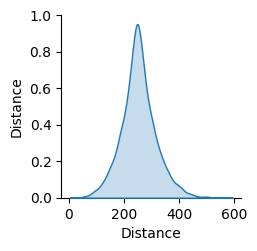

In [24]:
import seaborn as sns
sns.pairplot(train_df, diag_kind='kde')

In [25]:
new_genetator = gen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='Filename',
    y_col='Distance',
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='raw',
    batch_size=1,
)

Found 5000 validated image filenames.


In [26]:
# run thorugh all batches in the test generator and save predictions and true values into a csv
predictions = []
true_values = []

for i in range(len(new_genetator)):
    x, y = test_generator[i]
    predictions += list(model.predict(x).flatten())
    true_values += list(y)

1/1 [==============================] - 0s 128ms/step


ValueError: Asked to retrieve element 157, but the Sequence has length 157

In [27]:
df = pd.DataFrame({'True Distance': true_values, 'Predicted Distance': predictions, 'Difference': np.abs(np.array(true_values) - np.array(predictions))}, index=new_genetator.filenames)
df.to_csv('predictions.csv')

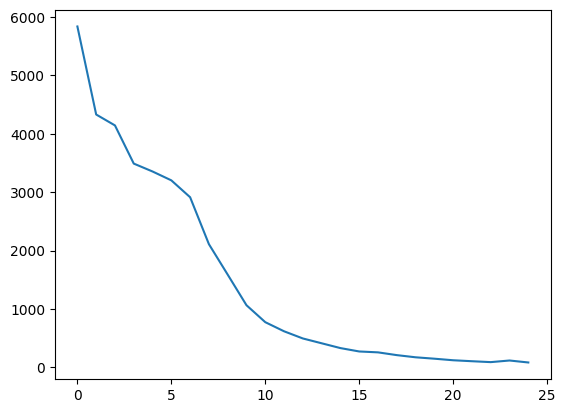

In [34]:
# plot of loss
plt.plot(history.history['loss'])
plt.savefig('graphs/loss.png')

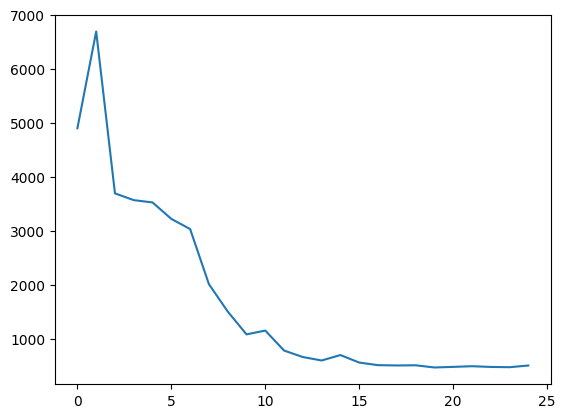

In [33]:
plt.plot(history.history['val_loss'])
plt.savefig('graphs/val_loss.png')

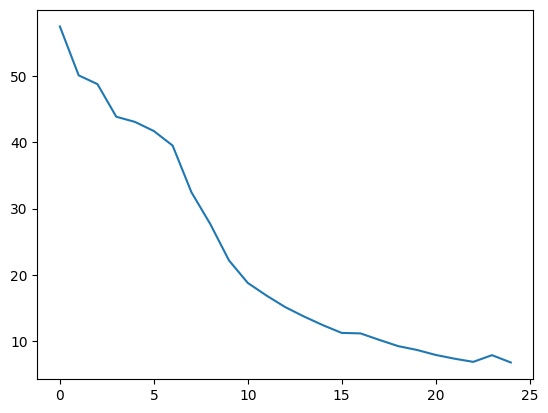

In [31]:
# plot of mean absolute error
plt.plot(history.history['mae'])
plt.savefig('graphs/mae.png')

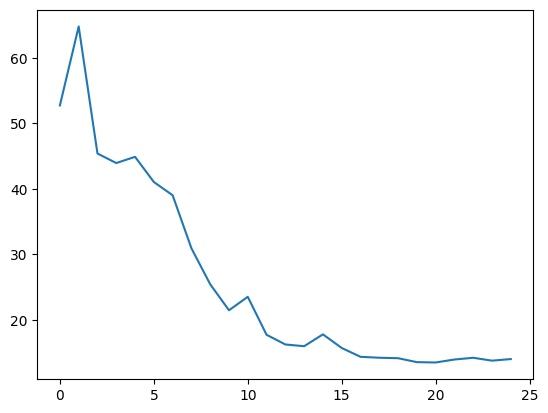

In [32]:
plt.plot(history.history['val_mae'])
plt.savefig('graphs/val_mae.png')